In [81]:
print('Hare Krishna')

Hare Krishna


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import ttest_ind, pearsonr, f_oneway
from sklearn.utils.class_weight import compute_class_weight
from sklearn.datasets import load_iris, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import matthews_corrcoef, precision_recall_curve, auc
from scipy.stats import chi2_contingency

## Step 1 : Problem Statement

Developing an advanced machine learning model for the early detection of heart disease (0 = no disease, 1 = disease) by leveraging patient demographics and clinical features. The project, part of the Google Solution Challenge, aims to utilize parameters such as age, chest pain type, and cholesterol levels to predict the likelihood of heart disease. Employing a diverse set of machine learning algorithms, including Logistic Regression, Decision Tree, Random Forest, Deep Neural Network, Linear Discriminant Analysis (LDA), and AdaBoost, the objective is to explore various parameter configurations for each algorithm. The ultimate goal is to identify the optimal model that achieves the highest accuracy, facilitating proactive healthcare measures for individuals at risk of heart disease. This project aligns with the Google Solution Challenge's mission of addressing real-world problems through innovative and effective technological solutions.

## Step 2: Data Gathering

In [83]:
heart_df = pd.read_csv('Heart_Disease_Dataset.csv')
df=heart_df

In [84]:
heart_df1 = pd.read_csv('Heart_Disease_Dataset.csv')
heart_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Step 3 : EDA(Exploratory Data Analysis)

In [85]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [86]:
heart_df['target'] = heart_df['target'].astype(int)

<Axes: xlabel='age', ylabel='Density'>

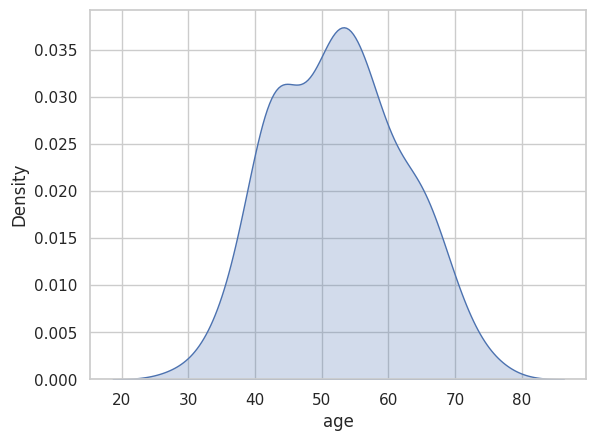

In [87]:
## analysing variation in heart disease with respect ot age
df_target1=heart_df[heart_df['target']==1]
sns.kdeplot(data=df_target1,x='age',fill=True)

In [88]:
#Separating features into continuous and categorical
categorical= [feature for feature in heart_df.columns if len(heart_df[feature].unique())<=5]
continuous= [feature for feature in heart_df.columns if len(heart_df[feature].unique())>5]
print("categorical variables are: ", categorical)
print("Continous variables are: ",continuous)

categorical variables are:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continous variables are:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


## Analysing if age plays a specific role in contraction of heart disease

In [89]:
df_target1=heart_df[heart_df["target"]==1]
df_target0=heart_df[heart_df["target"]==0]

In [90]:
# Performing T-test since, one is categorical and another is continuous.
from scipy.stats import ttest_ind
age_no_disease = df_target0['age']
age_disease = df_target1['age']

# Performing independent two-sample t-test
t_statistic, p_value = ttest_ind(age_no_disease, age_disease, equal_var=False)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Age and target are correlated.")
else:
    print("Age and target are not correlated.")


T-Statistic: 4.079669145481814
P-Value: 5.781030372508417e-05
Age and target are correlated.


<ipython-input-91-89aa64b8b490>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target1['age_group']=pd.cut(heart_df['age'],bins=bins,right=False)


<Axes: xlabel='age_group', ylabel='count'>

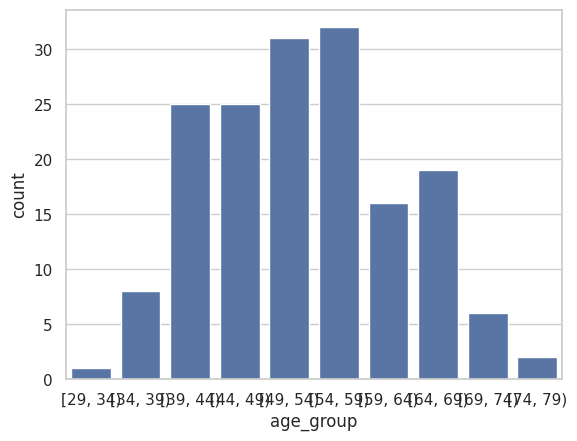

In [91]:
# Dividing ages into age groups for better analysis
labels = ['30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79']
bins=[29,34,39,44,49,54,59,64,69,74,79]
df_target1['age_group']=pd.cut(heart_df['age'],bins=bins,right=False)
heart_df['age_group']=pd.cut(heart_df['age'],bins=bins,right=False)
sns.countplot(data=df_target1,x='age_group',fill=True)

## Observation: In general, ages between 39 to 59 are most prone to heart diseases

In [92]:
# Checking if Sex and target have a relation
contingency_table = pd.crosstab(heart_df['sex'], heart_df['target'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-squared value:", chi2)
print("P-value:", p)

alpha = 0.05
if p < alpha:
    print("There is a significant association between sex and disease.")
else:
    print("There is no significant association between sex and disease.")

Chi-squared value: 22.717227046576355
P-value: 1.8767776216941503e-06
There is a significant association between sex and disease.


In [93]:
male=heart_df[heart_df['sex']==1]
female=heart_df[heart_df['sex']==0]

<Axes: xlabel='age_group', ylabel='count'>

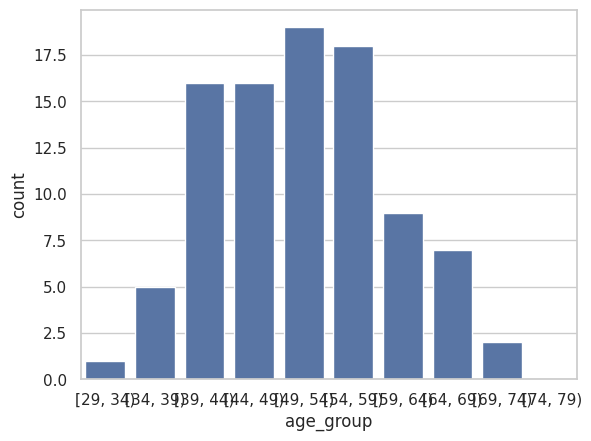

In [94]:
sns.countplot(data=male[male['target']==1],x='age_group')

## Observation: Based on the above graph, it is clearly visible that men with ages 39 to 59 are most prone to heart diseases.

<Axes: xlabel='age_group', ylabel='count'>

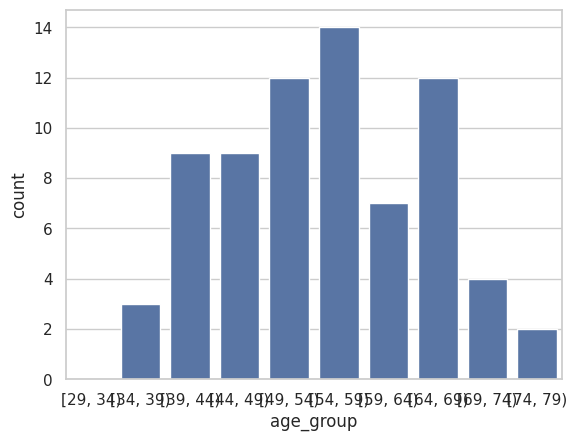

In [95]:
sns.countplot(data=female[female['target']==1],x='age_group')

## Observation: Based on above graph, it is clearly visible that women with ages 39 to 69 are most prone to heart diseases.

## Resting electrocardiography results (Restecg) and disease

In [96]:
contingency_table = pd.crosstab(heart_df['restecg'], heart_df['target'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-squared value:", chi2)
print("P-value:", p)
alpha = 0.05
if p < alpha:
    print("There is a significant association between restecg and heart disease.")
else:
    print("There is no significant association between restecg and heart disease.")

Chi-squared value: 10.023091785081
P-value: 0.006660598773498031
There is a significant association between restecg and heart disease.


In [97]:
contingency_table = pd.crosstab(heart_df['restecg'], heart_df['age_group'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-squared value:", chi2)
print("P-value:", p)
alpha = 0.05
if p < alpha:
    print("There is a significant assocation between restecg and age.")
else:
    print("There is no significant association between restecg and age.")

Chi-squared value: 44.869928154739895
P-value: 0.00043272047097396294
There is a significant assocation between restecg and age.


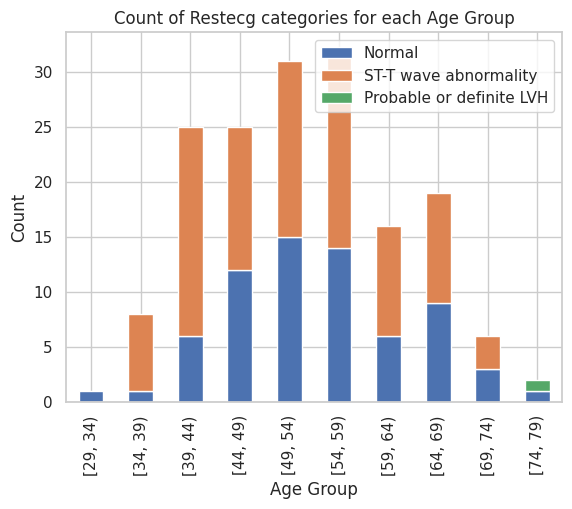

In [98]:
grouped_data = df_target1.groupby(['age_group', 'restecg']).size().unstack()
ax = grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Restecg categories for each Age Group')
legend_labels = {0: 'Normal', 1: 'ST-T wave abnormality', 2: 'Probable or definite LVH'}
handles, _ = ax.get_legend_handles_labels()
ax.legend([handles[idx] for idx in range(len(legend_labels))], legend_labels.values())
plt.show()

## Observation: It is evident that the likelihood of developing heart disease is higher for ST-T wave abnormality, showing an increasing trend with age.

## Analysing relation between old peak and heart disease

In [99]:
# Performing T-test since, one is categorical and another is continuous.
a = df_target0['oldpeak']
b = df_target1['oldpeak']

# Performing independent two-sample t-test
t_statistic, p_value = ttest_ind(a, b, equal_var=False)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print("oldpeak and target are correlated.")
else:
    print("oldpeak and target are not correlated.")

T-Statistic: 7.938556202707923
P-Value: 1.1096104777240863e-13
oldpeak and target are correlated.


In [100]:
age = heart_df['age']
thalach = heart_df['oldpeak']
correlation_coefficient, p_value = pearsonr(age, thalach)
print("Pearson Correlation Coefficient:")
print(f"Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("There is a significant linear relationship between age and oldpeak.")
else:
    print("There is no significant linear relationship between age and oldpeak.")


Pearson Correlation Coefficient:
Coefficient: 0.21001256735867366
P-value: 0.00023168502798974613
There is a significant linear relationship between age and oldpeak.


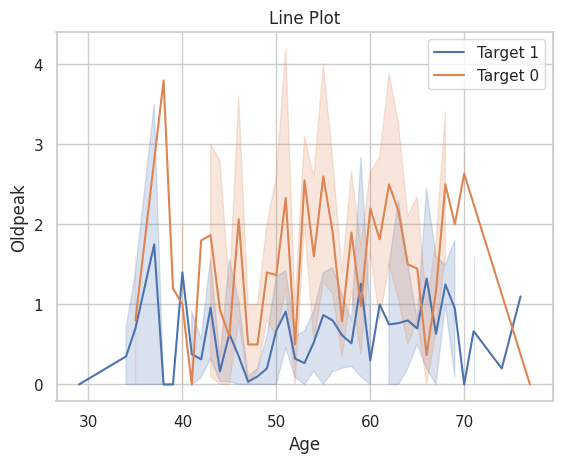

In [101]:
heart_df_sorted = heart_df.sort_values(by='age')
sns.set(style="whitegrid")
fig, ax = plt.subplots()
sns.lineplot(data=heart_df_sorted[heart_df_sorted['target'] == 1], x='age', y='oldpeak', ax=ax, label='Target 1')
sns.lineplot(data=heart_df_sorted[heart_df_sorted['target'] == 0], x='age', y='oldpeak', ax=ax, label='Target 0')
plt.title('Line Plot')
plt.xlabel('Age')
plt.ylabel('Oldpeak')
plt.grid(True)
plt.legend()
plt.show()


<Axes: xlabel='age_group', ylabel='count'>

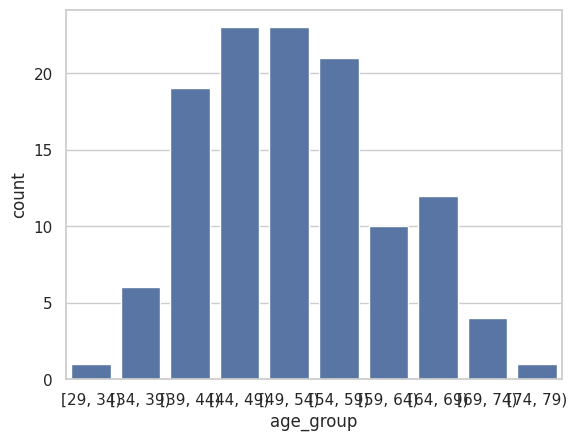

In [102]:
sns.countplot(data=heart_df[(heart_df['oldpeak']<1) & (heart_df['target']==1)],x='age_group')

In [103]:
percentage=(heart_df[(heart_df['oldpeak'] < 1) & (heart_df['target'] == 1)].count() / heart_df[heart_df['oldpeak'] < 1].count())
percentage[0]

0.7228915662650602

## Observations: Oldpeak below 1.0 is dangerous. 73% of patients with oldpeak below 1.0 have heart disease. Age-groups between 39-59 have higher chance of contraction of disease due to low oldpeak.

## Analysing relation between ca and heart disease

In [104]:
contingency_table = pd.crosstab(heart_df['ca'], heart_df['target'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of an association between 'ca' and 'target'.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence of an association between 'ca' and 'target'.")

Chi-square statistic: 74.3666
P-value: 0.0000
Reject the null hypothesis. There is evidence of an association between 'ca' and 'target'.


In [105]:
# Applying Anova because ca is a three category variable and age is a continuous variable
result = f_oneway(heart_df['age'][heart_df['ca'] == 0],
                 heart_df['age'][heart_df['ca'] == 1],
                 heart_df['age'][heart_df['ca'] == 2],
                 heart_df['age'][heart_df['ca'] == 3])

print(result)

F_onewayResult(statistic=17.378372258954855, pvalue=2.051903777079083e-10)


In [106]:
# since, f_oneway is close to zero, there is strong relation between them.

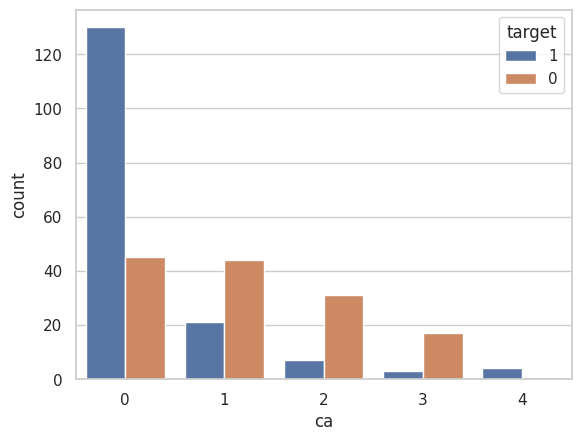

In [107]:
heart_df['target'] = heart_df['target'].astype(str)
sns.countplot(data=heart_df, x='ca', hue='target')
plt.show()
heart_df['target'] = heart_df['target'].astype(int)

## Observation:
1) number of major vessels = 0 has next most chance of heart disease.
2) number of major vessels = 1 has moderate chances of heart disease.
3) number of major vessels = 2 has less chance of heart disease.
4) number of major vessels = 3 has least chances of heart disease.
Lower the number of major vessels, higher the chances of disease.

## Step 4 : Feature Engineering

In [108]:
heart_df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
age_group    0
dtype: int64

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


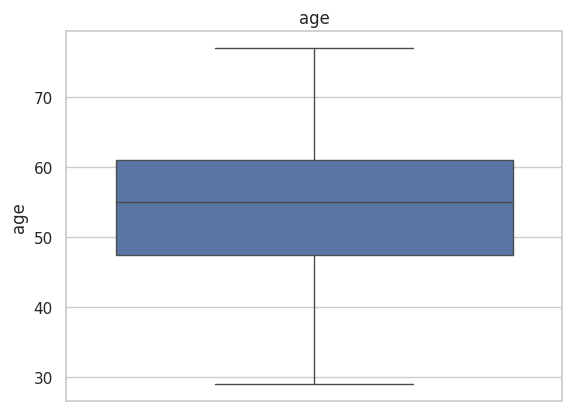

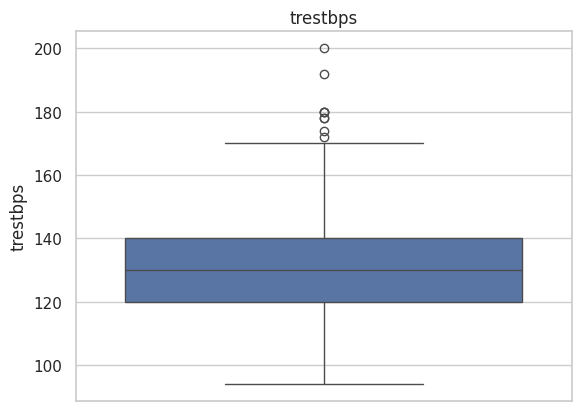

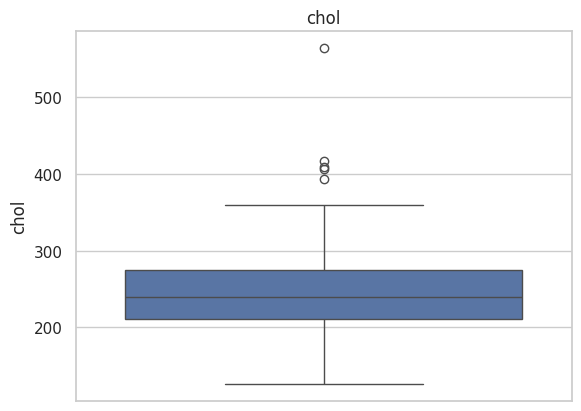

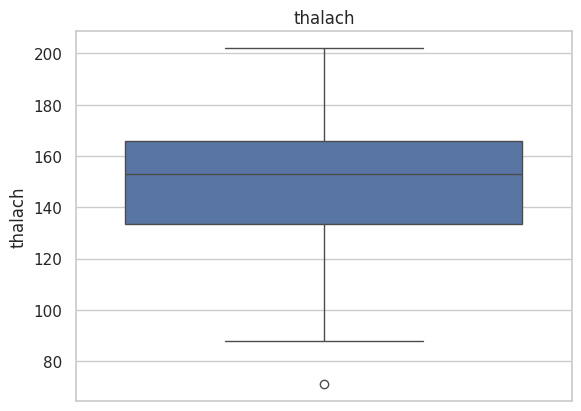

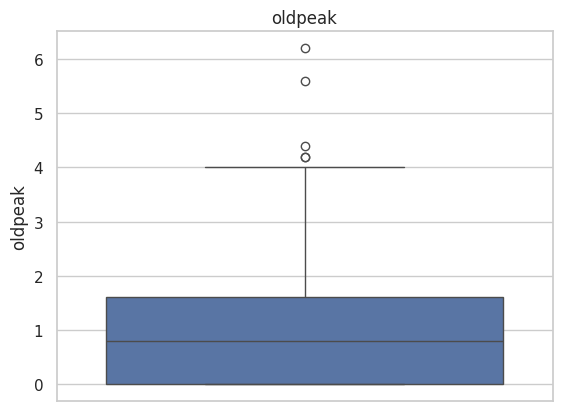

In [109]:
print(continuous)
for feature in continuous:
    sns.boxplot(heart_df[feature])
    plt.title(feature)
    plt.show()

###  Finding and Replacing outliers with operatile and lower tail

In [110]:
# To replace outliers
def Finding_outliar1(heart_df,columns):
    for column in columns:
            q1 = heart_df[column].quantile(0.25)
            q3 = heart_df[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr

            heart_df[column] = heart_df[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = continuous

Finding_outliar1(heart_df,columns)

## Scaling

### Method:- Normalization

In [111]:
heart_df.drop(['age_group'],axis=1,inplace=True)

In [112]:
for feature in categorical:
    heart_df = pd.get_dummies(heart_df, columns=[feature], prefix=feature, drop_first=True, dtype=int)

In [113]:
normal = MinMaxScaler()
normal_Sc = normal.fit_transform(heart_df.iloc[:,:-1])
df_Normal = pd.DataFrame(normal_Sc,columns=heart_df.iloc[:,:-1].columns)
heart_df.iloc[:,:-1]=df_Normal
heart_df

<ipython-input-113-caa0c0b86f69>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  heart_df.iloc[:,:-1]=df_Normal


,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,0.708333,0.671053,0.438974,0.556503,0.575,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.166667,0.473684,0.508718,0.872068,0.875,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.250000,0.473684,0.320000,0.744136,0.350,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,0.562500,0.342105,0.451282,0.795309,0.200,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.583333,0.342105,0.935385,0.667377,0.150,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.605263,0.471795,0.326226,0.050,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
299,0.333333,0.210526,0.566154,0.402985,0.300,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
300,0.812500,0.657895,0.274872,0.479744,0.850,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
301,0.583333,0.473684,0.020513,0.257996,0.300,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0


## Step 5 : Feature Selection

## Checking Multicolinearity

In [114]:
df1=heart_df

In [115]:
def calculate_vif(data_frame):
    vif = []
    for i in range(data_frame.shape[1]):
        vif_cal = variance_inflation_factor(data_frame.values, i)
        vif.append((data_frame.columns[i], vif_cal))
    return vif

def drop_max_vif(data_frame, dropped_columns=None):
    if dropped_columns is None:
        dropped_columns = []

    vif = calculate_vif(data_frame)
    max_vif_column, max_vif_value = max(vif, key=lambda x: x[1])
    if max_vif_value > 5:
        print(f"Dropping column '{max_vif_column}' with VIF: {max_vif_value}")
        # Drop the column and reset the index
        data_frame = data_frame.drop(columns=[max_vif_column]).reset_index(drop=True)
        # Recursively call the function
        return drop_max_vif(data_frame, dropped_columns + [max_vif_column])
    else:
        print("VIF values are now between 1 and 5.")
        return data_frame, dropped_columns
df1_dropped, dropped_columns = drop_max_vif(df1)
vif_after_dropping = calculate_vif(df1_dropped)
print("VIF values after dropping columns:")
for col, vif_value in vif_after_dropping:
    print(f"{col}: {vif_value}")
print("List of dropped columns:", dropped_columns)
df1=df1_dropped

Dropping column 'thal_2' with VIF: 29.983533964095063
Dropping column 'thalach' with VIF: 12.054305585359666
Dropping column 'age' with VIF: 11.034891733355177
Dropping column 'slope_2' with VIF: 7.277067044629944
Dropping column 'chol' with VIF: 6.108069572476149
VIF values are now between 1 and 5.
VIF values after dropping columns:
trestbps: 4.889648394976107
oldpeak: 2.7416961555924866
sex_1: 3.425163827059424
cp_1: 1.753506453429079
cp_2: 2.2988524557418772
cp_3: 1.3826695192616618
fbs_1: 1.284847065928496
restecg_1: 2.07504587137785
restecg_2: 1.0913055577432629
exang_1: 2.035975467579778
slope_1: 2.1569232260502704
ca_1: 1.473807668204052
ca_2: 1.4023736389080734
ca_3: 1.2563947312879487
ca_4: 1.0667958104470694
thal_1: 1.3088493366690848
thal_3: 2.658965991001778
target_1: 3.3441244518950097
List of dropped columns: ['thal_2', 'thalach', 'age', 'slope_2', 'chol']


## Step 6: Train test split

In [116]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values

In [117]:
xtr,xte,ytr,yte= train_test_split(x,y,test_size=0.2,random_state=42)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

## Step 7 : model training

### 1) Logistic Regression algorithm

In [118]:
class_labels = [0, 1]

class_weights = compute_class_weight(class_weight='balanced',classes=class_labels,y=ytrain)

weights_dict = {class_labels[i]: weight for i, weight in enumerate(class_weights)}

logreg = LogisticRegression(max_iter=1000, class_weight=weights_dict, random_state=42)

param_grid = {'penalty': ['l2',], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(logreg, param_grid, cv=cv, scoring='f1', verbose=0, n_jobs=-1)

grid_search.fit(xtrain, ytrain)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)
ytest_pred=grid_search.predict(xtest)

Best Parameters:  {'C': 100, 'penalty': 'l2'}
Best Score:  0.8581256648842857


In [119]:
conf_matrix = confusion_matrix(ytest,ytest_pred)
print(conf_matrix)
print(50*"_")
print(50*"*")

class_rep = classification_report(ytest,ytest_pred)
print (class_rep)
print(50*"_")
print(50*"*")

[[25  4]
 [ 4 28]]
__________________________________________________
**************************************************
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

__________________________________________________
**************************************************


0.8688524590163934
ROC is: 0.8685344827586206


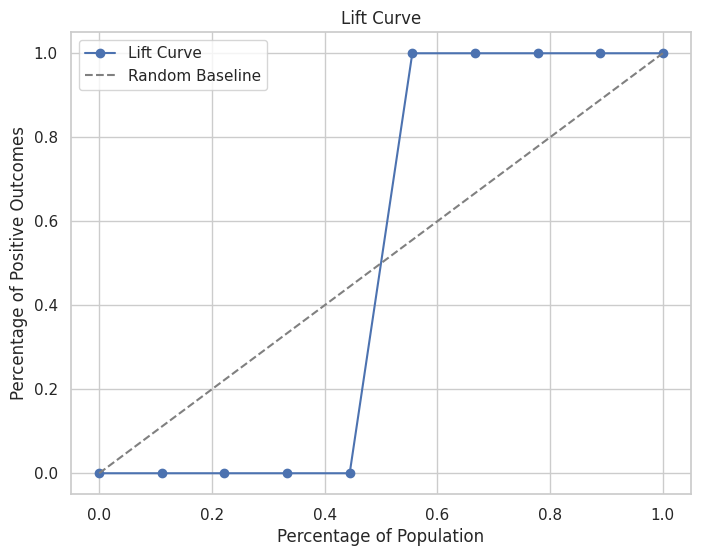

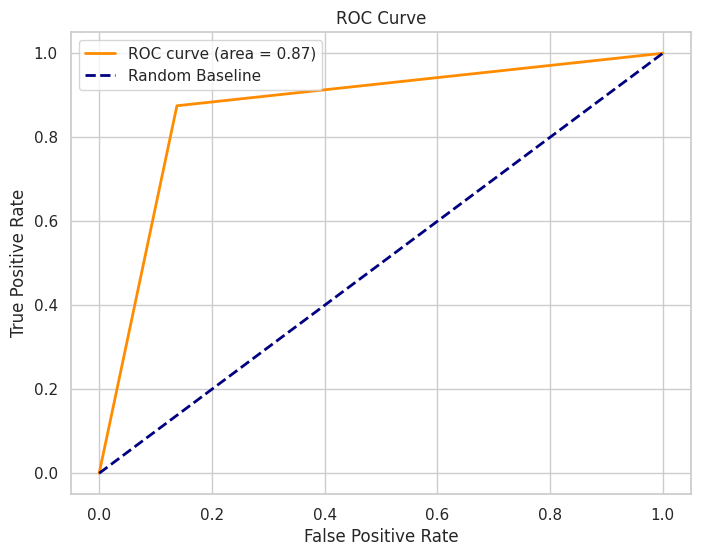

In [120]:
fpr, tpr, thresholds = roc_curve(ytest, ytest_pred)
print(accuracy_score(ytest,ytest_pred))
roc_auc = auc(fpr, tpr)
print('ROC is:',roc_auc)
num_points = 10
lift_points = np.linspace(0, 1, num_points)
lift_values = [np.percentile(ytest_pred, point * 100) for point in lift_points]

plt.figure(figsize=(8, 6))
plt.plot(lift_points, lift_values, marker='o', linestyle='-', color='b', label='Lift Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Baseline')

plt.title('Lift Curve')
plt.xlabel('Percentage of Population')
plt.ylabel('Percentage of Positive Outcomes')

plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [121]:
mcc = matthews_corrcoef(ytest, ytest_pred > 0.5)
print("Matthews Correlation Coefficient (MCC): {:.4f}".format(mcc))
precision, recall, thresholds = precision_recall_curve(ytest, ytest_pred)
prc_auc = auc(recall, precision)
print('PRC AUC:',prc_auc)

Matthews Correlation Coefficient (MCC): 0.7371
PRC AUC: 0.9077868852459017


### 2) Random Forest algorithm

In [50]:
rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 120, 140],
    'criterion': ['gini'],
    'max_depth': [None, 10, 15, 20],
    'max_features': ['sqrt', 0.5, 0.7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'verbose':[0]
}

grid_search_rf = GridSearchCV(
    rf_classifier,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0,
    n_jobs=-1
)

grid_search_rf.fit(xtrain, ytrain)

print("Best Parameters: ", grid_search_rf.best_params_)
print("Best Accuracy: ", grid_search_rf.best_score_)


Best Parameters:  {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 120, 'verbose': 0}
Best Accuracy:  0.8261054421768707


In [51]:
ytest_pred = grid_search_rf.predict(xtest)

In [52]:
Random_Testing_accuracy = accuracy_score(ytest,ytest_pred)
print(f"Accuracy = {Random_Testing_accuracy}")

Random_Testing_classification = classification_report(ytest,ytest_pred)
print(f"classification_report = {Random_Testing_classification}")

Random_Testing_confusion = confusion_matrix(ytest,ytest_pred)
print(f"confusion_matrix = {Random_Testing_confusion}")

Accuracy = 0.7868852459016393
classification_report =               precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.88      0.69      0.77        32

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61

confusion_matrix = [[26  3]
 [10 22]]


accuracy is:  0.7868852459016393
ROC is: 0.7920258620689655


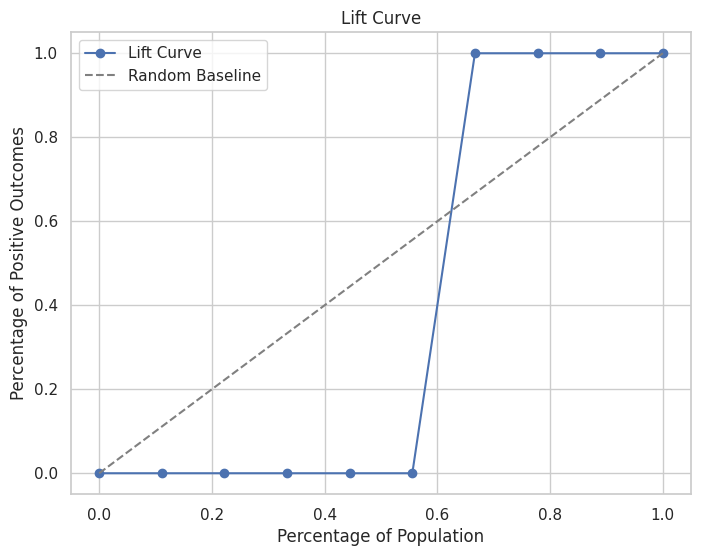

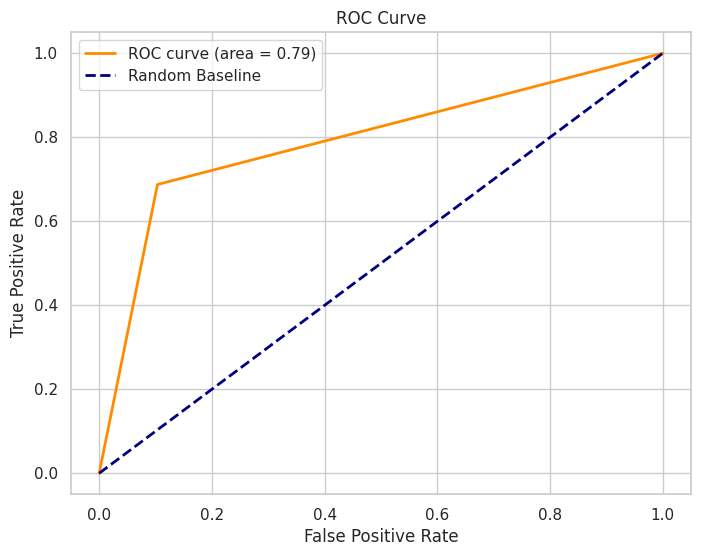

Matthews Correlation Coefficient (MCC): 0.5931
PRC AUC: 0.8657172131147541


In [53]:
fpr, tpr, thresholds = roc_curve(ytest, ytest_pred)
print('accuracy is: ',accuracy_score(ytest,ytest_pred))
roc_auc = auc(fpr, tpr)
print('ROC is:',roc_auc)
num_points = 10
lift_points = np.linspace(0, 1, num_points)
lift_values = [np.percentile(ytest_pred, point * 100) for point in lift_points]

plt.figure(figsize=(8, 6))
plt.plot(lift_points, lift_values, marker='o', linestyle='-', color='b', label='Lift Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Baseline')

plt.title('Lift Curve')
plt.xlabel('Percentage of Population')
plt.ylabel('Percentage of Positive Outcomes')

plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
mcc = matthews_corrcoef(ytest, ytest_pred > 0.5)
print("Matthews Correlation Coefficient (MCC): {:.4f}".format(mcc))
precision, recall, thresholds = precision_recall_curve(ytest, ytest_pred)
prc_auc = auc(recall, precision)
print('PRC AUC:',prc_auc)

## 3) Decision Tree Algorithm

In [54]:
dt_classifier = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt'],  # Experiment with different values
    'class_weight': ['balanced', None],
}

grid_search_dt = GridSearchCV(
    dt_classifier,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0,
    n_jobs=-1
)

grid_search_dt.fit(xtrain, ytrain)

print("Best Parameters: ", grid_search_dt.best_params_)
print("Best Accuracy: ", grid_search_dt.best_score_)

ytest_pred = grid_search_dt.best_estimator_.predict(xtest)

accuracy = accuracy_score(ytest, ytest_pred)
print("Decision Tree Accuracy: {:.2f}%".format(accuracy * 100))


Best Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Accuracy:  0.7893707482993196
Decision Tree Accuracy: 75.41%


In [55]:
y1test_pred_forest = grid_search_dt.predict(xtest)

In [56]:
Random_Testing_accuracy = accuracy_score(ytest,y1test_pred_forest)
print(f"Accuracy = {Random_Testing_accuracy}")

Random_Testing_classification = classification_report(ytest,y1test_pred_forest)
print(f"classification_report = {Random_Testing_classification}")

Random_Testing_confusion = confusion_matrix(ytest,y1test_pred_forest)
print(f"confusion_matrix = {Random_Testing_confusion}")

Accuracy = 0.7540983606557377
classification_report =               precision    recall  f1-score   support

           0       0.68      0.90      0.78        29
           1       0.87      0.62      0.73        32

    accuracy                           0.75        61
   macro avg       0.78      0.76      0.75        61
weighted avg       0.78      0.75      0.75        61

confusion_matrix = [[26  3]
 [12 20]]


accuracy is:  0.7540983606557377
ROC is: 0.7607758620689655


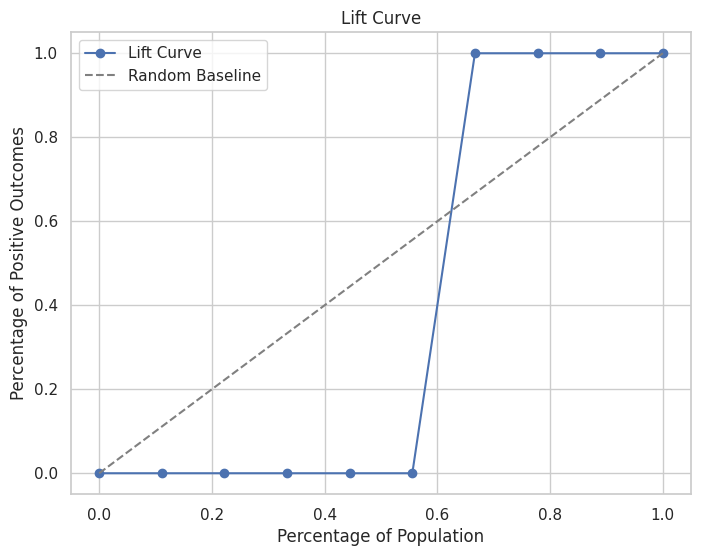

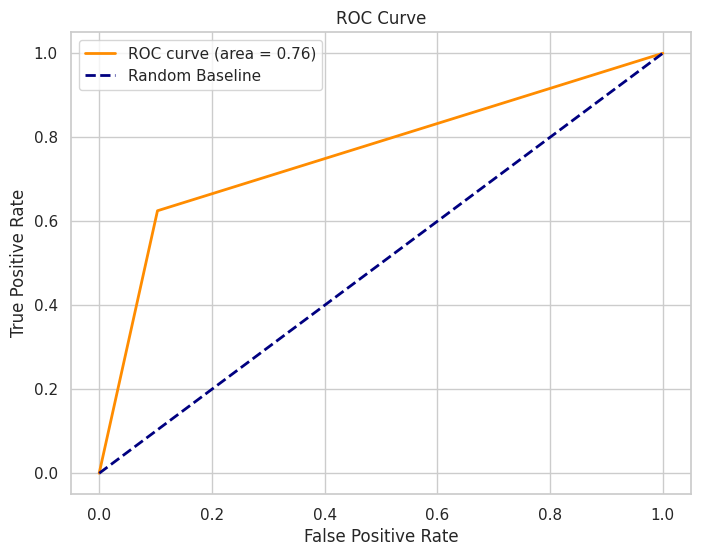

Matthews Correlation Coefficient (MCC): 0.5374
PRC AUC: 0.8456432644333571


In [57]:
fpr, tpr, thresholds = roc_curve(ytest, ytest_pred)
print('accuracy is: ',accuracy_score(ytest,ytest_pred))
roc_auc = auc(fpr, tpr)
print('ROC is:',roc_auc)
num_points = 10
lift_points = np.linspace(0, 1, num_points)
lift_values = [np.percentile(ytest_pred, point * 100) for point in lift_points]

plt.figure(figsize=(8, 6))
plt.plot(lift_points, lift_values, marker='o', linestyle='-', color='b', label='Lift Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Baseline')

plt.title('Lift Curve')
plt.xlabel('Percentage of Population')
plt.ylabel('Percentage of Positive Outcomes')

plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
mcc = matthews_corrcoef(ytest, ytest_pred > 0.5)
print("Matthews Correlation Coefficient (MCC): {:.4f}".format(mcc))
precision, recall, thresholds = precision_recall_curve(ytest, ytest_pred)
prc_auc = auc(recall, precision)
print('PRC AUC:',prc_auc)

## 4) K nearest Neighbours

In [58]:
param_grid = {'n_neighbors': range(1, 20, 2)}

knn_classifier = KNeighborsClassifier()

grid_search = GridSearchCV(knn_classifier, param_grid, cv=5,verbose=0)
grid_search.fit(xtrain,ytrain)

best_k = grid_search.best_params_['n_neighbors']

best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

best_knn_classifier.fit(xtrain,ytrain)

y1test_pred_forest = best_knn_classifier.predict(xtest)
ytest_pred=y1test_pred_forest
accuracy = accuracy_score(ytest, y1test_pred_forest)
print(f'Best k: {best_k}')
print(f'Accuracy: {accuracy}')


Best k: 7
Accuracy: 0.8360655737704918


In [59]:
Random_Testing_accuracy = accuracy_score(ytest,y1test_pred_forest)
print(f"Accuracy = {Random_Testing_accuracy}")

Random_Testing_classification = classification_report(ytest,y1test_pred_forest)
print(f"classification_report = {Random_Testing_classification}")

Random_Testing_confusion = confusion_matrix(ytest,y1test_pred_forest)
print(f"confusion_matrix = {Random_Testing_confusion}")

Accuracy = 0.8360655737704918
classification_report =               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

confusion_matrix = [[26  3]
 [ 7 25]]


accuracy is:  0.8360655737704918
ROC is: 0.8389008620689655


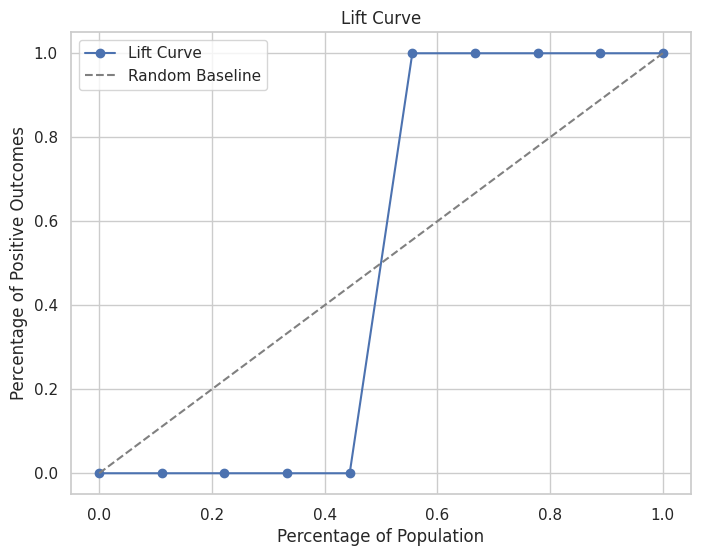

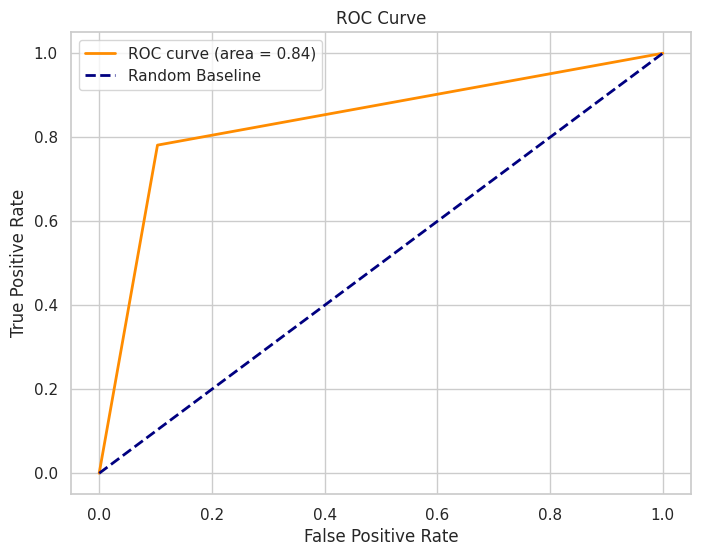

Matthews Correlation Coefficient (MCC): 0.6793
PRC AUC: 0.8944306206088992


In [60]:
fpr, tpr, thresholds = roc_curve(ytest, ytest_pred)
print('accuracy is: ',accuracy_score(ytest,ytest_pred))
roc_auc = auc(fpr, tpr)
print('ROC is:',roc_auc)
num_points = 10
lift_points = np.linspace(0, 1, num_points)
lift_values = [np.percentile(ytest_pred, point * 100) for point in lift_points]

plt.figure(figsize=(8, 6))
plt.plot(lift_points, lift_values, marker='o', linestyle='-', color='b', label='Lift Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Baseline')

plt.title('Lift Curve')
plt.xlabel('Percentage of Population')
plt.ylabel('Percentage of Positive Outcomes')

plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
mcc = matthews_corrcoef(ytest, ytest_pred > 0.5)
print("Matthews Correlation Coefficient (MCC): {:.4f}".format(mcc))
precision, recall, thresholds = precision_recall_curve(ytest, ytest_pred)
prc_auc = auc(recall, precision)
print('PRC AUC:',prc_auc)

## 5) Adaboost

In [61]:
base_model = grid_search_dt.best_estimator_

adaboost_classifier = AdaBoostClassifier(base_model, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
}

grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy',verbose=0)

grid_search.fit(xtrain,ytrain)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

best_model = grid_search.best_estimator_

y_pred_train = best_model.predict(xtrain)
train_accuracy = accuracy_score(ytrain, y_pred_train)
print("Training Accuracy with Best Model:", train_accuracy)

y_pred_test = best_model.predict(xtest)
test_accuracy = accuracy_score(ytest, y_pred_test)
print("Test Accuracy with Best Model:", test_accuracy)
y1test_pred_forest=y_pred_test
ytest_pred=y_pred_test
print("\nBest Parameters:", best_params)
print("Best Cross-Validated Accuracy:", best_accuracy)


Training Accuracy with Best Model: 1.0
Test Accuracy with Best Model: 0.8032786885245902

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best Cross-Validated Accuracy: 0.8136904761904763


In [62]:
Random_Testing_accuracy = accuracy_score(ytest,y1test_pred_forest)
print(f"Accuracy = {Random_Testing_accuracy}")

Random_Testing_classification = classification_report(ytest,y1test_pred_forest)
print(f"classification_report = {Random_Testing_classification}")

Random_Testing_confusion = confusion_matrix(ytest,y1test_pred_forest)
print(f"confusion_matrix = {Random_Testing_confusion}")

Accuracy = 0.8032786885245902
classification_report =               precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

confusion_matrix = [[24  5]
 [ 7 25]]


accuracy is:  0.8032786885245902
ROC is: 0.8044181034482758


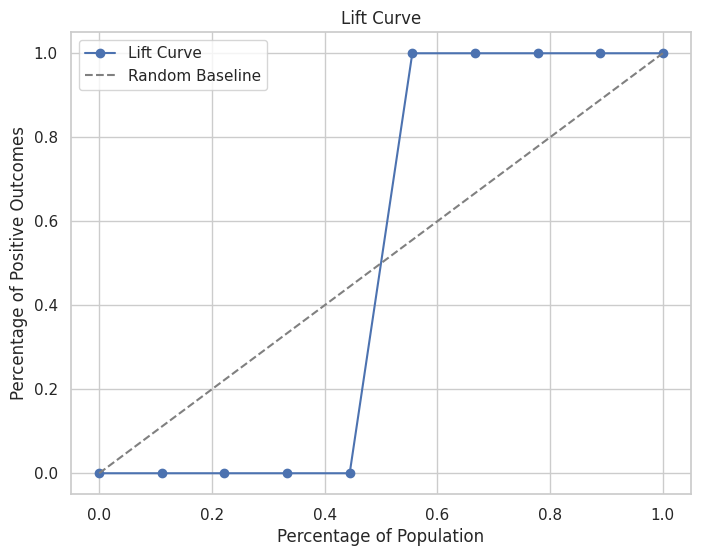

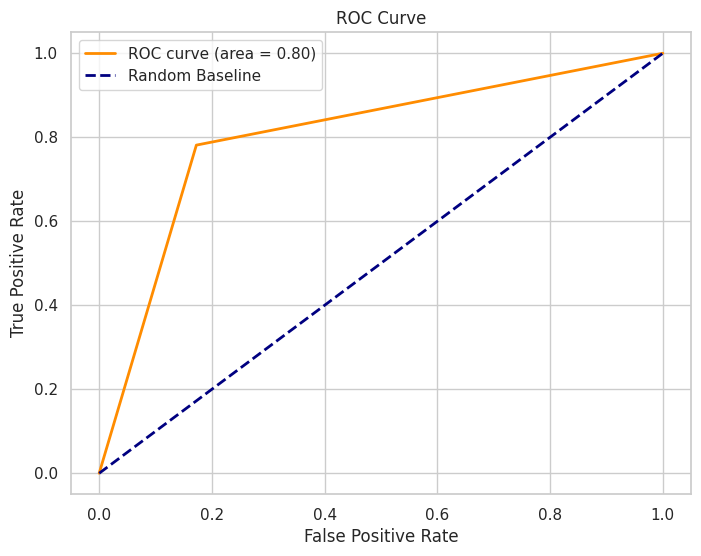

Matthews Correlation Coefficient (MCC): 0.6082
PRC AUC: 0.8646687158469946


In [63]:
fpr, tpr, thresholds = roc_curve(ytest, ytest_pred)
print('accuracy is: ',accuracy_score(ytest,ytest_pred))
roc_auc = auc(fpr, tpr)
print('ROC is:',roc_auc)
num_points = 10
lift_points = np.linspace(0, 1, num_points)
lift_values = [np.percentile(ytest_pred, point * 100) for point in lift_points]

plt.figure(figsize=(8, 6))
plt.plot(lift_points, lift_values, marker='o', linestyle='-', color='b', label='Lift Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Baseline')

plt.title('Lift Curve')
plt.xlabel('Percentage of Population')
plt.ylabel('Percentage of Positive Outcomes')

plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
mcc = matthews_corrcoef(ytest, ytest_pred > 0.5)
print("Matthews Correlation Coefficient (MCC): {:.4f}".format(mcc))
precision, recall, thresholds = precision_recall_curve(ytest, ytest_pred)
prc_auc = auc(recall, precision)
print('PRC AUC:',prc_auc)

## 6) Naive Bayes

In [64]:
naive_bayes_classifier = GaussianNB()

naive_bayes_classifier.fit(xtrain,ytrain)

y1test_pred_forest = naive_bayes_classifier.predict(xtest)
ytest_pred=y1test_pred_forest
test_accuracy_naive_bayes = accuracy_score(ytest, ytest_pred)
print("Test Accuracy with Gaussian Naive Bayes Model:", test_accuracy_naive_bayes)
ytest_pred=y1test_pred_forest

Test Accuracy with Gaussian Naive Bayes Model: 0.5409836065573771


In [65]:
Random_Testing_accuracy = accuracy_score(ytest,y1test_pred_forest)
print(f"Accuracy = {Random_Testing_accuracy}")

Random_Testing_classification = classification_report(ytest,y1test_pred_forest)
print(f"classification_report = {Random_Testing_classification}")

Random_Testing_confusion = confusion_matrix(ytest,y1test_pred_forest)
print(f"confusion_matrix = {Random_Testing_confusion}")

Accuracy = 0.5409836065573771
classification_report =               precision    recall  f1-score   support

           0       0.51      0.93      0.66        29
           1       0.75      0.19      0.30        32

    accuracy                           0.54        61
   macro avg       0.63      0.56      0.48        61
weighted avg       0.64      0.54      0.47        61

confusion_matrix = [[27  2]
 [26  6]]


accuracy is:  0.5409836065573771
ROC is: 0.5592672413793104


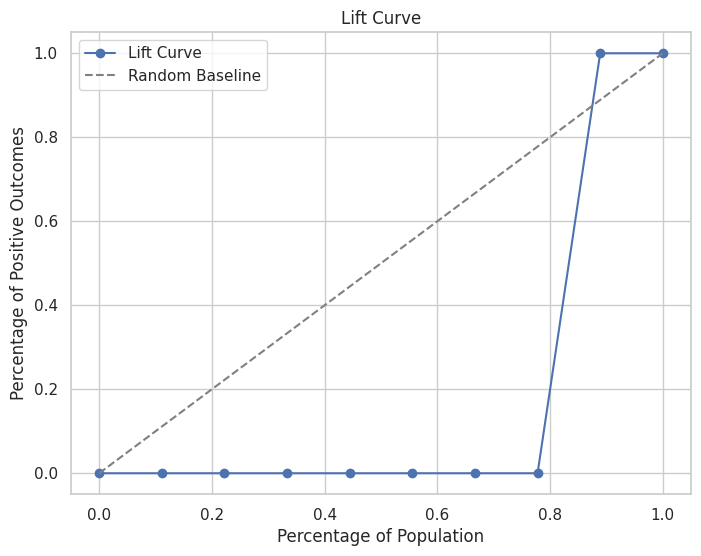

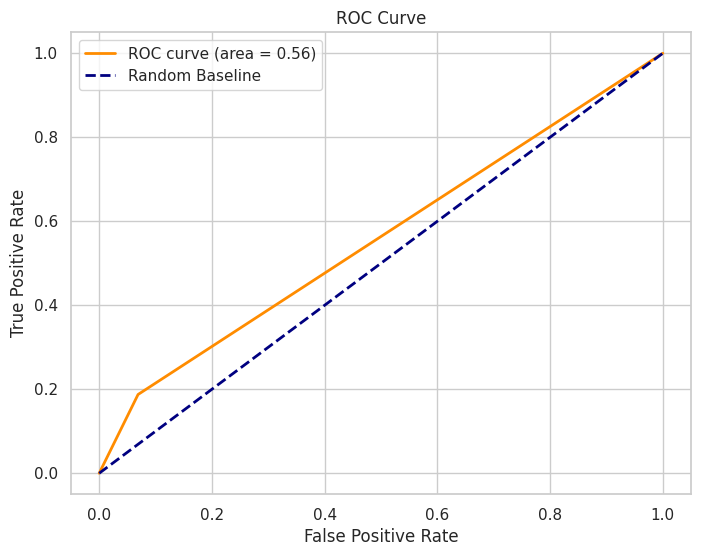

Matthews Correlation Coefficient (MCC): 0.1754
PRC AUC: 0.6818647540983607


In [66]:
fpr, tpr, thresholds = roc_curve(ytest, ytest_pred)
print('accuracy is: ',accuracy_score(ytest,ytest_pred))
roc_auc = auc(fpr, tpr)
print('ROC is:',roc_auc)
num_points = 10
lift_points = np.linspace(0, 1, num_points)
lift_values = [np.percentile(ytest_pred, point * 100) for point in lift_points]

plt.figure(figsize=(8, 6))
plt.plot(lift_points, lift_values, marker='o', linestyle='-', color='b', label='Lift Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Baseline')

plt.title('Lift Curve')
plt.xlabel('Percentage of Population')
plt.ylabel('Percentage of Positive Outcomes')

plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
mcc = matthews_corrcoef(ytest, ytest_pred > 0.5)
print("Matthews Correlation Coefficient (MCC): {:.4f}".format(mcc))
precision, recall, thresholds = precision_recall_curve(ytest, ytest_pred)
prc_auc = auc(recall, precision)
print('PRC AUC:',prc_auc)

## 7) Linear Discriminant analysis

In [67]:

lda = LinearDiscriminantAnalysis()

lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')

param_grid = {'n_components': [None, 1, 2]}

grid_search = GridSearchCV(lda, param_grid, cv=10, scoring='accuracy',verbose=0)

grid_search.fit(xtrain,ytrain)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

best_model = grid_search.best_estimator_
y_pred_train = best_model.transform(xtrain)
y_pred_train = best_model.predict(xtrain)

train_accuracy = accuracy_score(ytrain, y_pred_train)
print("Training Accuracy with Best Model:", train_accuracy)

y_pred_test = best_model.transform(xtest)
ytest_pred = best_model.predict(xtest)
y1test_pred_forest=ytest_pred
test_accuracy = accuracy_score(ytest, ytest_pred)
print("Test Accuracy with Best Model:", test_accuracy)

print("\nBest Parameters:", best_params)
print("Best Cross-Validated Accuracy:", best_accuracy)

Training Accuracy with Best Model: 0.859504132231405
Test Accuracy with Best Model: 0.8688524590163934

Best Parameters: {'n_components': None}
Best Cross-Validated Accuracy: 0.8305000000000001


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 608, in fit
    raise ValueError(
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/model_

In [68]:
Random_Testing_accuracy = accuracy_score(ytest,y1test_pred_forest)
print(f"Accuracy = {Random_Testing_accuracy}")

Random_Testing_classification = classification_report(ytest,y1test_pred_forest)
print(f"classification_report = {Random_Testing_classification}")

Random_Testing_confusion = confusion_matrix(ytest,y1test_pred_forest)
print(f"confusion_matrix = {Random_Testing_confusion}")

Accuracy = 0.8688524590163934
classification_report =               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

confusion_matrix = [[26  3]
 [ 5 27]]


accuracy is:  0.8688524590163934
ROC is: 0.8701508620689655


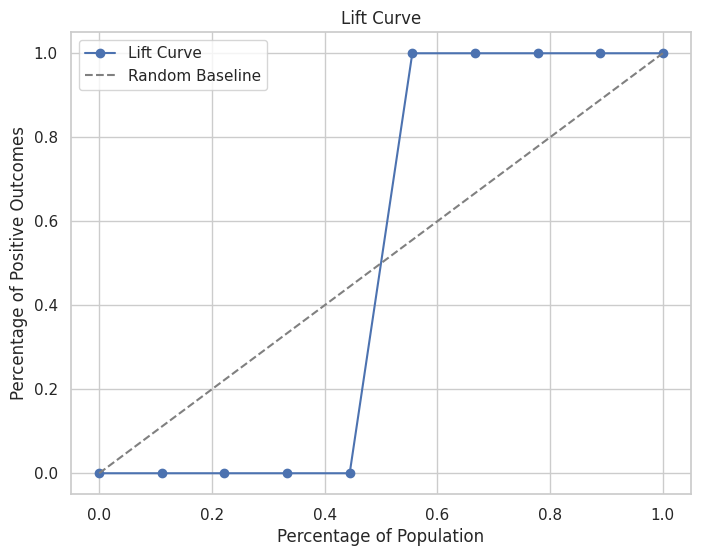

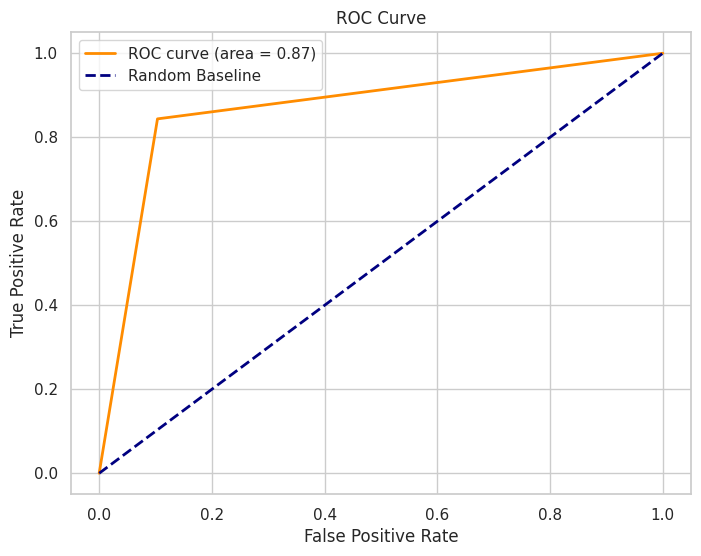

Matthews Correlation Coefficient (MCC): 0.7395
PRC AUC: 0.912858606557377


In [69]:
fpr, tpr, thresholds = roc_curve(ytest, ytest_pred)
print('accuracy is: ',accuracy_score(ytest,ytest_pred))
roc_auc = auc(fpr, tpr)
print('ROC is:',roc_auc)
num_points = 10
lift_points = np.linspace(0, 1, num_points)
lift_values = [np.percentile(ytest_pred, point * 100) for point in lift_points]

plt.figure(figsize=(8, 6))
plt.plot(lift_points, lift_values, marker='o', linestyle='-', color='b', label='Lift Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Baseline')

plt.title('Lift Curve')
plt.xlabel('Percentage of Population')
plt.ylabel('Percentage of Positive Outcomes')

plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
mcc = matthews_corrcoef(ytest, ytest_pred > 0.5)
print("Matthews Correlation Coefficient (MCC): {:.4f}".format(mcc))
precision, recall, thresholds = precision_recall_curve(ytest, ytest_pred)
prc_auc = auc(recall, precision)
print('PRC AUC:',prc_auc)

## 8) Deep Neural Networks

In [70]:
def initialize_params(n_x, n_h, n_y):
    params={}
    w1 = np.random.randn(n_h, n_x) * 0.01
    w2 = np.random.randn(n_y, n_h) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    b2 = np.zeros(shape=(n_y, 1))
    params = {"w1": w1,
              "w2": w2,
              "b1": b1,
              "b2": b2}
    return params
def initialize_params_deep(layer_dims):
    params={}
    L=len(layer_dims)
    for l in range (1,L):
        params['w'+str(l)]=np.random.randn(layer_dims[l],layer_dims[l-1])*0.001
        params['b'+str(l)]=np.zeros(shape=(layer_dims[l],1))
    return params
def sigmoid(z):
    return 1 / (1 + np.exp(-z)), z
def relu(z):
    return np.maximum(0, z),z
def linear_forward(a, w, b):
    z = np.dot(w, a) + b
    assert(z.shape == (w.shape[0], a.shape[1]))
    return z, a, w, b
def linear_activation_forward(a_prev, w, b, activation):
    z, a, w, b = linear_forward(a_prev, w, b)
    if activation == 'sigmoid':
        a, z = sigmoid(z)
    elif activation == "relu":
        a, z = relu(z)
    assert(a.shape == (w.shape[0], a_prev.shape[1]))
    return z, a, w, b
def l_model_forward(x, params, layer_dims):
    a = x
    L = len(params) // 2
    a_t=[]
    w_t=[]
    z_t=[]
    b_t=[]
    for l in range(1, L):
        a_prev = a
        z,a,w,b = linear_activation_forward(a_prev, params['w' + str(l)], params['b' + str(l)], activation='relu')
        a = np.array(a).reshape(layer_dims[l], x.shape[1])
        z = np.array(z).reshape(layer_dims[l], x.shape[1])
        w = np.array(w).reshape(layer_dims[l], layer_dims[l-1])
        b = np.array(b).reshape(layer_dims[l], 1)
        a_t.append(a)
        w_t.append(w)
        z_t.append(z)
        b_t.append(b)

    zL,aL,wL,bL = linear_activation_forward(a, params['w' + str(L)], params['b' + str(L)], activation='sigmoid')

    aL = np.array(aL).reshape(layer_dims[L], x.shape[1])
    zL = np.array(zL).reshape(layer_dims[L], x.shape[1])
    wL = np.array(wL).reshape(layer_dims[L], layer_dims[L-1])
    bL = np.array(bL).reshape(layer_dims[L], 1)
    a_t.append(aL)
    w_t.append(wL)
    z_t.append(zL)
    b_t.append(bL)
    assert(aL.shape == (1, x.shape[1]))

    return aL, a_t, z_t, w_t, b_t, zL, wL, bL
def loss(ytr,aL,m):
    epsilon = 0
    q = np.multiply(ytr, np.log(aL + epsilon))
    p = np.multiply(1 - ytr, np.log(1 - aL + epsilon))
    c=-(1/320)*(q+p)
    c=np.squeeze(c)
    c=np.sum(c)
    return c
def back_propagation(ytr, aL, layer_dims, xtr, z_t, a_t, w_t, b_t):
    grads = {}
    a0 = xtr
    L = len(layer_dims)
    z = z_t[L-2]
    daL=-(np.divide(ytr,aL)-((1-ytr)/1-aL))
    dzL=-(np.multiply(daL,(np.exp(-z)/(1+np.exp(-z))**2)))
    grads['dw' + str(L-1)] = np.dot(dzL, a_t[L-2].T)
    dbL = np.sum(dzL, axis=1, keepdims=True) / xtr.shape[1]
    grads['dz' + str(L-1)] = dzL
    grads['db' + str(L-1)] = dbL

    for l in reversed(range(1, len(layer_dims) - 1)):
        grads['da' + str(l)] = np.dot(w_t[l].T, grads['dz' + str(l+1)])
        grads['dz' + str(l)] = np.multiply(grads['da' + str(l)], (z_t[l-1] > 0).astype(int))

        if l == 1:
            grads['dw' + str(l)] = np.dot(grads['dz' + str(l)], a0.T)
            grads['db' + str(l)] = np.sum(grads['dz' + str(l)], axis=1, keepdims=True) / xtr.shape[1]
        else:
            grads['dw' + str(l)] = np.dot(grads['dz' + str(l)], a_t[l-2].T)
            grads['db' + str(l)] = np.sum(grads['dz' + str(l)], axis=1, keepdims=True) / xtr.shape[1]

    return grads, daL

def predict(x, params, layer_dims):
    L = len(layer_dims) - 1
    a = x
    for l in range(1, L):
        a_prev = a
        z, a, w, b = linear_activation_forward(a_prev, params['w' + str(l)], params['b' + str(l)], activation='relu')
    zL, aL, wL, bL = linear_activation_forward(a, params['w' + str(L)], params['b' + str(L)], activation='sigmoid')
    aL = np.array(aL).reshape(layer_dims[L], x.shape[1])
    zL = np.array(zL).reshape(layer_dims[L], x.shape[1])
    wL = np.array(wL).reshape(layer_dims[L], layer_dims[L-1])
    bL = np.array(bL).reshape(layer_dims[L], 1)
    assert(aL.shape == (1, x.shape[1]))
    return aL


def update_params(params,grads,learning_rate):
    L=len(params)//2
    print
    for l in range(L):
        params["w"+str(l+1)]=params["w"+str(l+1)]-learning_rate*grads["dw"+str(l+1)]
        params["b"+str(l+1)]=params["b"+str(l+1)]-learning_rate*grads["db"+str(l+1)]
def model(xtr, ytr, layer_dims, cycle, xte, yte):
    m = xtr.shape[1]
    xtr = xtr.T
    q=ytr
    ytr = ytr.T
    print(ytr.shape)
    ytr = ytr.reshape(1, q.shape[0])
    params=initialize_params(layer_dims[0],layer_dims[1],layer_dims[2])
    params = initialize_params_deep(layer_dims)
    for i in range(cycle):
        aL, a_t, z_t, w_t, b_t, zL, wL, bL = l_model_forward(xtr, params, layer_dims)
        Loss = loss(ytr, aL, m)
        if Loss < 0.5:
            return Loss, params
        if i == cycle - 1:
            return Loss, params
        grads, daL = back_propagation(ytr, aL, layer_dims, xtr, a_t, z_t, w_t, b_t)
        update_params(params,grads,0.001)

In [71]:
j=[xtr.shape[1],3,4,1]
params=initialize_params(xtr.shape[0],j[-2],ytr.shape[0])
params=initialize_params_deep(j)
Loss,params=model(xtr,ytr,j,500,xte,yte)
Loss

(242,)


0.5311590883962706

In [72]:
aL=predict(xte.T,params,j)
aL=np.where(aL>0.5,1,0)
y1test_pred_forest=aL.T
ytest_pred=y1test_pred_forest
accuracy_score(yte,aL.T)

0.47540983606557374

In [73]:
Random_Testing_accuracy = accuracy_score(ytest,y1test_pred_forest)
print(f"Accuracy = {Random_Testing_accuracy}")

Random_Testing_classification = classification_report(ytest,y1test_pred_forest)
print(f"classification_report = {Random_Testing_classification}")

Random_Testing_confusion = confusion_matrix(ytest,y1test_pred_forest)
print(f"confusion_matrix = {Random_Testing_confusion}")

Accuracy = 0.47540983606557374
classification_report =               precision    recall  f1-score   support

           0       0.48      1.00      0.64        29
           1       0.00      0.00      0.00        32

    accuracy                           0.48        61
   macro avg       0.24      0.50      0.32        61
weighted avg       0.23      0.48      0.31        61

confusion_matrix = [[29  0]
 [32  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy is:  0.47540983606557374
ROC is: 0.5


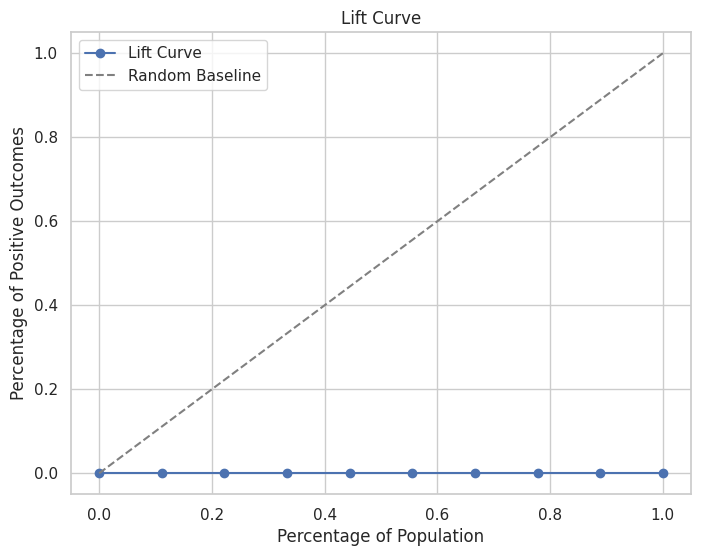

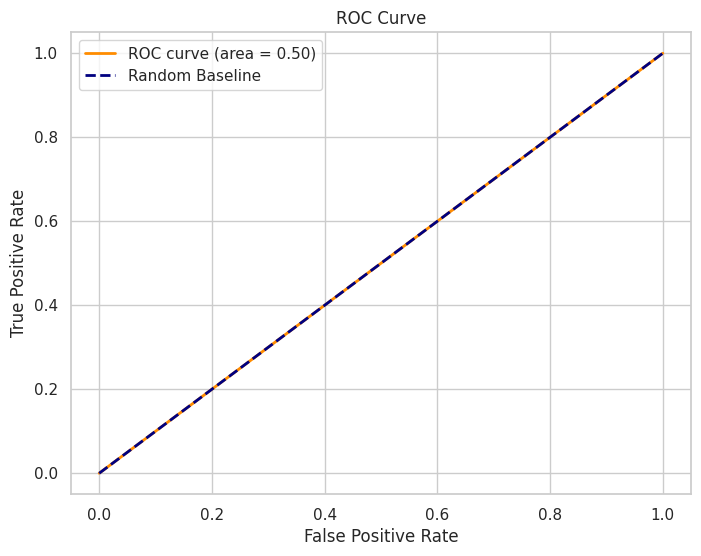

Matthews Correlation Coefficient (MCC): 0.0000
PRC AUC: 0.7622950819672132


In [74]:
fpr, tpr, thresholds = roc_curve(ytest, ytest_pred)
print('accuracy is: ',accuracy_score(ytest,ytest_pred))
roc_auc = auc(fpr, tpr)
print('ROC is:',roc_auc)
num_points = 10
lift_points = np.linspace(0, 1, num_points)
lift_values = [np.percentile(ytest_pred, point * 100) for point in lift_points]

plt.figure(figsize=(8, 6))
plt.plot(lift_points, lift_values, marker='o', linestyle='-', color='b', label='Lift Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Baseline')

plt.title('Lift Curve')
plt.xlabel('Percentage of Population')
plt.ylabel('Percentage of Positive Outcomes')

plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
mcc = matthews_corrcoef(ytest, ytest_pred > 0.5)
print("Matthews Correlation Coefficient (MCC): {:.4f}".format(mcc))
precision, recall, thresholds = precision_recall_curve(ytest, ytest_pred)
prc_auc = auc(recall, precision)
print('PRC AUC:',prc_auc)

In [75]:
def predictable_x(df, trestbps, oldpeak, sex, cp, fbs, restecg, exang, slope, ca, thal):
    if fbs > 120:
        fbs = 1
    else:
        fbs = 0
    if cp == 'typical angina':
        cp = 0
    elif cp == 'atypical angina':
        cp = 1
    elif cp == 'non anginal':
        cp = 2
    else:
        cp = 3
    if restecg == 'normal':
        restecg = 0
    elif restecg == 'ST-T wave abnormality':
        restecg = 1
    elif restecg == 'left ventricular hypertrophy':
        restecg = 2
    if exang == 'yes':
        exang = 1
    else:
        exang = 0
    if slope == 'upsloping':
        slope = 0
    elif slope == 'downsloping':
        slope = 1
    else:
        slope = 2
    if thal == 'error':
        thal = 0
    elif thal == 'fixed defect':
        thal = 1
    elif thal == 'normal':
        thal = 2
    else:
        thal = 3

    xpr = pd.DataFrame({
        'age': [0],
        'sex': [sex],
        'cp': [cp],
        'trestbps': [trestbps],
        'chol': [0],
        'fbs': [fbs],
        'restecg': [restecg],
        'thalach': [0],
        'exang': [exang],
        'oldpeak': [oldpeak],
        'slope': [slope],
        'ca': [ca],
        'thal': [thal],
        'target': [1]
    })


    df = pd.concat([df, xpr], ignore_index=True)
    for feature in df.columns:
        if feature in categorical:
            df = pd.get_dummies(df, columns=[feature], prefix=feature, drop_first=True, dtype=int)
    df.iloc[:,:-1] = normal.transform(df.iloc[:,:-1])
    df.drop(dropped_columns, axis=1, inplace=True)
    return df

In [76]:
xpr=predictable_x(df,145,0.5,1,'asymptomatic',200,'normal','no','unsloping',0,'fixed defect')

<ipython-input-75-1d62a96b6710>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,:-1] = normal.transform(df.iloc[:,:-1])


In [77]:
yp = best_model.predict(xpr.iloc[-1, :-1].values.reshape(1, -1))
if(yp==1):
    print("YES, YOU HAVE HEART DISEASE")
else:
    print("NO, YOU DONT HAVE HEART DISEASE")

YES, YOU HAVE HEART DISEASE


In [78]:
xpr=predictable_x(df,145,2.5,1,'asymptomatic',200,'normal','no','unsloping',0,'fixed defect')

<ipython-input-75-1d62a96b6710>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,:-1] = normal.transform(df.iloc[:,:-1])


In [79]:
## Predicting through Linear Discriminant Analysis

In [80]:
yp = best_model.predict(xpr.iloc[-1, :-1].values.reshape(1, -1))
if(yp==1):
    print("YES, YOU HAVE HEART DISEASE")
else:
    print("NO, YOU DONT HAVE HEART DISEASE")

NO, YOU DONT HAVE HEART DISEASE
